# 요구사항 분석 및 문제정의

- 간단한 EDA와 관련된 함수를 학습
- BMI데이터를 확인해 보고 잘 분류가 될 수 있는지 시각화
- KNN의 개념에 대해서 학습
- KNN을 이용해서 학습
- 머신러닝 프로세스에 대해 학습

# 데이터 수집

In [52]:
import pandas as pd

bmi=pd.read_csv("./data/bmi_500.csv")


# EDA (탐색적 데이터 분석)

In [2]:
bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [3]:
#처음부터 일부 데이터를 확인
#괄호안에 숫자를 입력하면 해당 숫자만큼 출력

In [4]:
#데이터의 정보를 출력하는 함수
#데이터의 수, 컬럼의 수, 컬럼의 특성/ 데이터 타입- 결측치 확인
#Dtype: object(범주형), int/float(수치형)

bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [5]:
# 범주형 컬럼의 클래스의 목록을 보는 함수 
print(bmi['Gender'].unique())

['Male' 'Female']


In [6]:
#범주형 컬럼의 클래스별 갯수를 확인 
#데이터가 한쪽으로 치우쳐 있는지 확인
print(bmi['Gender'].value_counts())

Female    255
Male      245
Name: Gender, dtype: int64


In [7]:
#수치형 데이터의 편향(치우침)확인 하는 함수
#0이면 정규분포, (0에 가까울수록 중앙- 치우쳐있지 않다. )
#양수이면 왼쪽으로 치우친 데이터이고 음수이면 오른쪽으로 치우친 데이터를 표시
print(bmi['Height'].skew())
print(bmi['Weight'].skew())

-0.12191368980139153
-0.037692236922098034


In [8]:
# 데이터의 간단한 기술 통계를 보여주는 함수
#데이터의 개수, 평균, 표준편차, 최소/25%/중간값/75%/최대값
#결측치, 이상치, 편향(치우침 정도)
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [9]:
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


## bmi데이터가 분류가 될수 있는 데이터 인지 확인

In [10]:
#matplotlib: 파이썬 그래프 시각화 도구
# seaborn: matplotlib에 고급 그래프 시각화 도구를 제공

import matplotlib.pyplot as plt

#scatter: 산포도를 그리는 함수(2차원 좌표에 점을 찍는 함수 )
#x좌표:Weight, y좌표: Height

def myScatter(label, color):
    #파라미터로 넘어온 라벨의 해당 값들을 저장-불리언 인덱싱 
    tmp=bmi[bmi['Label']==label]
    
    #입력한 라벨값만 산포도를 그림
    #scatter(x좌표, y좌표, 색상, 라벨)
    plt.scatter(tmp['Weight'],tmp['Height'], c=color, label=label)

In [11]:
bmi['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

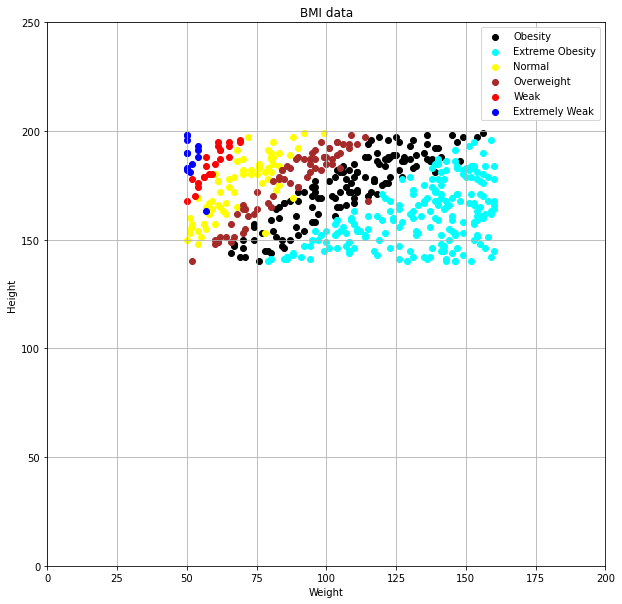

In [12]:
#그래프의 크기 설정
plt.figure(figsize=(10,10))


myScatter('Obesity',"black")
myScatter('Extreme Obesity',"aqua")
myScatter('Normal',"yellow")
myScatter('Overweight',"brown")
myScatter('Weak',"red")
myScatter('Extremely Weak',"blue")

# 범례추가(loc: 범례의 위치)
#loc를 써주지 않으면 알아서 데이터가 가장 작게 분포된 위치에 표시
plt.legend(loc="upper right")

#x축 라벨 표시(기본적으로 한글은 지원하지 않는다.)
plt.xlabel("Weight")

#y축 라벨 표시
plt.ylabel("Height")

#x축 눈금의 범위
plt.xlim(0,200)

#y축 눈금의 범위
plt.ylim(0,250)

#제목 표시
plt.title("BMI data")

#격차표시
plt.grid()

## 학습 데이터로 변환

- 특성데이터와 라벨 데이터로 분리
- 훈련 데이터와 테스트 데이터로 분리


In [13]:
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [14]:
# 특성 데이터와 라벨데이터로 분리
bmi_X=bmi[['Gender','Height','Weight']]
bmi_y=bmi['Label']



In [15]:
bmi_y.shape

(500,)

In [16]:
bmi_X.shape

(500, 2)

In [17]:
#훈련 데이터와 테스트 데이터로 분리(훈련 70%, 테스트 30%)
X_train=bmi_X.iloc[:350,:]
y_train=bmi_y[:350]
X_test=bmi_X.iloc[350:,:]
y_test=bmi_y[350:]

In [18]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((350, 2), (350,), (150, 2), (150,))

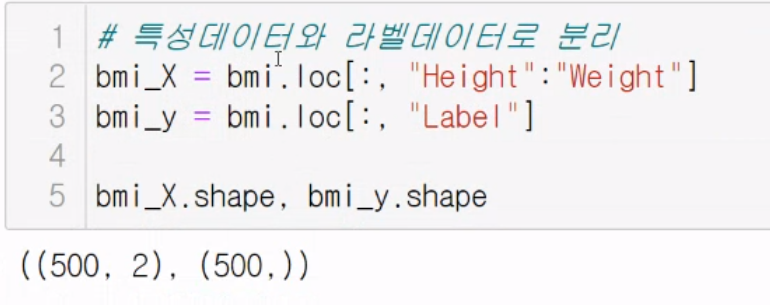

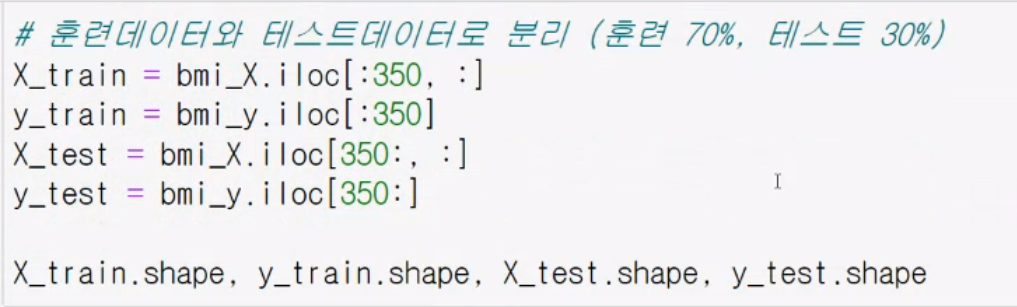

# knn으로 bmi데이터 학습


In [19]:
from sklearn.neighbors import KNeighborsClassifier

#n_neighbors: 이웃의 수
#이웃의 수가 적으면 과대적합
#이웃의 수가 많으면 과소적합
#HYper parameter Tuning:적당한 이웃의 수를 결정하는 것
knn_model=KNeighborsClassifier(n_neighbors=3)

# 훈련은 훈련데이터로
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
# 정확도 계산
#훈련정확도와 테스트 정확도가 모두 낮으면-> 과소적합
# 훈련정확도 보다 테스트 정확도가 높으면 ->과소적합
#훈련정확도와 테스트 정확도가 크게 차이나면-> 과대적합
#일반화 모델: 훈련정확도가 테스트 정확도가 약간 높은 모델 
print("훈련 정확도:", knn_model.score(X_train,y_train))
print("데스트 정확도:",knn_model.score(X_test,y_test))

훈련 정확도: 0.9342857142857143
데스트 정확도: 0.9


- 이웃의 수가 감소하면 과대적합이 생김

In [22]:
knn_model2=KNeighborsClassifier(n_neighbors=1)
knn_model2.fit(X_train,y_train)

print("훈련 정확도:", knn_model2.score(X_train,y_train))
print("데스트 정확도:",knn_model2.score(X_test,y_test))

훈련 정확도: 1.0
데스트 정확도: 0.8933333333333333


- 이웃의 수가 증가하면 과소적합이 생김


In [24]:
knn_model3=KNeighborsClassifier(n_neighbors=10)
knn_model3.fit(X_train,y_train)

print("훈련 정확도:", knn_model3.score(X_train,y_train))
print("데스트 정확도:",knn_model3.score(X_test,y_test))

훈련 정확도: 0.9085714285714286
데스트 정확도: 0.94


- 일반화된 모델을 찾아보자 - 하이퍼파라미터 튜닝

In [25]:
# 이웃의 수마다의 정확도
train_acc=[]
test_acc=[]

#사용할 이웃의 범위 값들을 정의 
neighbor=range(1,20)

for n in neighbor:
    knn_model=KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train)
    
    #이웃의 수마다의 훈련데이터 정확도와 테스트 데이터 정확도를 리스트에 저장 
    train_acc.append(knn_model.score(X_train,y_train))
    test_acc.append(knn_model.score(X_test,y_test))

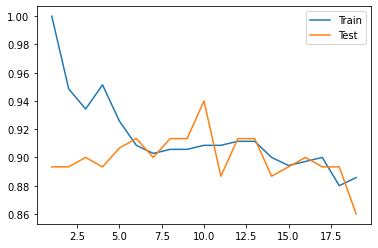

In [31]:
#시각화 

import matplotlib.pyplot as plt

plt.plot(neighbor,train_acc, label='Train')
plt.plot(neighbor,test_acc, label='Test')

plt.legend()



In [53]:
# Gender 칼럼에서 male ->  0으로 Female -> 1로 변경 
bmi['Gender']=bmi['Gender'].map({"Male":0,"Female":1})

In [55]:
bmi.head()

,Gender,Height,Weight,Label
0,0,174,96,Obesity
1,0,189,87,Normal
2,1,185,110,Obesity
3,1,195,104,Overweight
4,0,149,61,Overweight


In [49]:
bmi['Gender'].replace("Male",1).replace("Female",0)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
495   NaN
496   NaN
497   NaN
498   NaN
499   NaN
Name: Gender, Length: 500, dtype: float64

In [56]:
bmi_X=bmi[['Gender','Height','Weight']]
bmi_y=bmi['Label']

X_train=bmi_X.iloc[:350,:]
y_train=bmi_y[:350]
X_test=bmi_X.iloc[350:,:]
y_test=bmi_y[350:]

In [57]:
# 이웃의 수마다의 정확도
train_acc=[]
test_acc=[]

#사용할 이웃의 범위 값들을 정의 
neighbor=range(1,20)

for n in neighbor:
    knn_model=KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train)
    
    #이웃의 수마다의 훈련데이터 정확도와 테스트 데이터 정확도를 리스트에 저장 
    train_acc.append(knn_model.score(X_train,y_train))
    test_acc.append(knn_model.score(X_test,y_test))

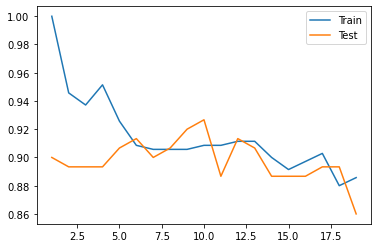

In [58]:
#시각화 

import matplotlib.pyplot as plt

plt.plot(neighbor,train_acc, label='Train')
plt.plot(neighbor,test_acc, label='Test')

plt.legend()


- 특성들끼리 각각 곱해서 새로운 특성을 추가

In [62]:
X_train2=X_train.copy()

#컬럼의 이름들을 가져온다. 
col=X_train2.columns

for i in range(col.size):
    for j in range(i, col.size):
        X_train2[col[i]+"x"+col[j]]=X_train2[col[i]]*X_train2[col[j]]
        
X_train2.head()

,Gender,Height,Weight,GenderxGender,GenderxHeight,GenderxWeight,HeightxHeight,HeightxWeight,WeightxWeight
0,0,174,96,0,0,0,30276,16704,9216
1,0,189,87,0,0,0,35721,16443,7569
2,1,185,110,1,185,110,34225,20350,12100
3,1,195,104,1,195,104,38025,20280,10816
4,0,149,61,0,0,0,22201,9089,3721


In [64]:
X_test2=X_test.copy()

#컬럼의 이름들을 가져온다. 
col=X_test2.columns

for i in range(col.size):
    for j in range(i, col.size):
        X_test2[col[i]+"x"+col[j]]=X_test2[col[i]]*X_test2[col[j]]
        
X_test2.head()

,Gender,Height,Weight,GenderxGender,GenderxHeight,GenderxWeight,HeightxHeight,HeightxWeight,WeightxWeight
350,0,184,83,0,0,0,33856,15272,6889
351,0,197,88,0,0,0,38809,17336,7744
352,1,160,51,1,160,51,25600,8160,2601
353,0,184,153,0,0,0,33856,28152,23409
354,0,190,50,0,0,0,36100,9500,2500


In [66]:
# 이웃의 수마다의 정확도
train_acc=[]
test_acc=[]

#사용할 이웃의 범위 값들을 정의 
neighbor=range(1,20)

for n in neighbor:
    knn_model=KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train2, y_train)
    
    #이웃의 수마다의 훈련데이터 정확도와 테스트 데이터 정확도를 리스트에 저장 
    train_acc.append(knn_model.score(X_train2,y_train))
    test_acc.append(knn_model.score(X_test2,y_test))

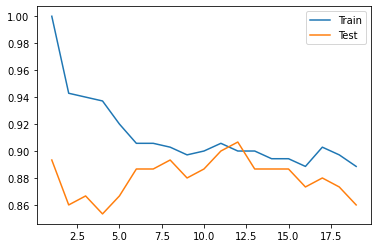

In [67]:
#시각화 

import matplotlib.pyplot as plt

plt.plot(neighbor,train_acc, label='Train')
plt.plot(neighbor,test_acc, label='Test')

plt.legend()

In [ ]:
## 특성데이터와 라벨데이터로 분리
bmi_X = bmi.loc[:, "Gender":"Weight"]
bmi_y = bmi.loc[:, "Label"]
bmi_X.shape, bmi_y.shape


# 훈련데이터와 테스트데이터로 분리 (훈련 70%, 테스트 30%)
X_train = bmi_X.iloc[:350, :]
y_train = bmi_y.iloc[:350]
X_test = bmi_X.iloc[350:, :]
y_test = bmi_y.iloc[350:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# 이웃의 수마다의 정확도
train_acc = []
test_acc = []
# 사용할 이웃의 범위 값들을 정의
neighbor = range(1, 20)
for n in neighbor :
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train)
    # 이웃의 수마다의 훈련데이터 정확도와 테스트데이터 정확도를 리스트에 저장
    train_acc.append(knn_model.score(X_train, y_train))
    test_acc.append(knn_model.score(X_test, y_test))

# 시각화
import matplotlib.pyplot as plt
plt.plot(neighbor, train_acc, label="Train")
plt.plot(neighbor, test_acc, label="Test")
plt.legend()

# 보스턴 집값 데이터를 이용한 knn 회귀



### 문제 정의 

- 보스턴 집값 데이터에서 어떤 특성이 집값에 얼마만큼 영향을 주는지 분석 
- 다중 공선성 문제에 대한 이해 
-  knn을 이용한 회귀분석

### 데이터 수집



In [2]:
# sklearn에서는 교육용 데이터 셋으로 딕셔너리 형태로 데이터를 제공
from sklearn.datasets import load_boston

boston=load_boston()

boston.keys()

#data :특성데이터
#target: 라벨 데이터
#feature_names : 컬럼명
#DESCR: 컬럼에 대한 설명 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

### 데이터 시각화 및 분석

- 딕셔너리를 데이터 프레임으로 변환
- 특성과 라벨 간의 상관관계 분석
- 분석 결과를 히트맵으로 시각화 

In [3]:
import pandas as pd

df_feature=pd.DataFrame(boston["data"], columns=boston["feature_names"])
3df_feature.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df_feature.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
#상관관계분석을 해보자
df_label= pd.DataFrame(boston['target'], columns=['price'])

df_label.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
#특성데이터와 라벨 데이터를 하나의 데이터 프레임으로 병합 -> concat()
# axis=1 열 방향으로 병합
df_boston=pd.concat([df_feature,df_label], axis=1)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
#특성과 라벨의 상관관계 분석
#corr은 피어슨 상관관계를 사용함(피어슨 상관 계수를 이용)

df_boston.corr()

#양의 값:  집값을 올리는 정도
#음의 값:  집값을 떨어뜨리는 정도
#0에 가까운 값: 집 값과 관련이 없는 특성  -> 삭제 하거나 따로 전처리 후에 사용 

#다중 공선성
#   -특성간의 공선성(데이터의 유사성)문제
    #-> 특성과 특성간의 상관관계가 90%이상인것 
    #-> 특성과 라벨간의 상관 관계가 더 낮은 특성을 삭제하거나 처리 
#   - 특성과 라벨의 공선성(데이터의 유사성) 문제
    #-> 특성과 라벨의 간의 상관관계가 90% 이상인것 
    #-> 해당 특성을 삭제하거나 처리 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


- train_test_split: 훈련데이터와 테스트데이터를 분리해주는 함수
    - 훈련 75% 테스트 25% 로 분리 (default)
    

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test=train_test_split(boston['data'],boston['target'],random_state=7)

#먼저 특성을 분리하고 그다음 라벨을 분리할것 
#random_state: 랜덤 시드를 설정 (항상 같은 데이터 셋을 사용하기 위한것)

In [10]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((379, 13), (127, 13), (379,), (127,))

# 모델 선택 및 훈련

In [12]:
from sklearn.neighbors import KNeighborsRegressor

knn_model4=KNeighborsRegressor(n_neighbors=5)
knn_model4.fit(X_train,y_train)

KNeighborsRegressor()

In [13]:
#평가 (회귀분석에서는 평가도구로 오차를 사용)
# 오차가 작으면 좋은 모델? 
#1번 모델의 오차 :10,-100=>-90
#2번 모델의 오차:2,3=>5
# -> 음수 오차로 인해서 직접 비교하기 어려운 문제가 발생 
#-> 음수를 양수로 변경하는 방법: 제곱, 절대값 ==> 평균제곱오차(mean squared error:MSE), 평균절대값오차(mean absolute error:MAE)

#MSE를 주로 더 많이 사용
#-> 제곱을 하기 때문에 좋은 모델과 나쁜 모델을 구분하기 쉬워짐

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
pred_train=knn_model4.predict(X_train)
pred_test=knn_model4.predict(X_test)

print("훈련 오차:",mean_squared_error(pred_train, y_train))
print("테스트 오차:",mean_squared_error(pred_test,y_test))

훈련 오차: 25.2812073878628
테스트 오차: 40.725077165354335


In [17]:
# 해당 값은 제곱이 된 값이기 때문에 원래 값이 아니다
#MSE는 제곱을 한 값이라 원래 값이 아님 -> 제곱근 사용
import numpy as np

print("훈련 오차:",np.sqrt(mean_squared_error(pred_train, y_train)))
print("테스트 오차:",np.sqrt(mean_squared_error(pred_test,y_test)))

훈련 오차: 5.028042102833149
테스트 오차: 6.381620261763805
